In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [56]:
import pandas as pd
data = pd.read_csv('datasets/insurance.csv')
y = np.array(data['charges'])

In [50]:
X = data[['age','bmi','children','smoker','region']]
cate = ['age','bmi','children','smoker','region']
gender = data['gender']
smoker = data['smoker']
region = data['region']
age = data['age']
bmi = data['bmi']
children = data['children']

In [51]:
from sklearn import preprocessing
LEG = preprocessing.LabelEncoder()
LEG.fit(gender)
gender_l = LEG.transform(gender)
LES = preprocessing.LabelEncoder()
LES.fit(smoker)
smoker_l = LES.transform(smoker)
LER = preprocessing.LabelEncoder()
LER.fit(region)
region_l = LER.transform(region)


In [58]:
x =[]
for i in range(len(gender)):
    x.append([age[i],gender_l[i],bmi[i],children[i],smoker_l[i],region_l[i]])
x = np.array(x)


[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


In [59]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,train_size=0.75,random_state=5)

In [66]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(xtrain,ytrain)
ytest_predicted = dtr.predict(xtest)

In [67]:
import sklearn.metrics as sm
print('Mean Absolute Error :',round(sm.mean_absolute_error(ytest,ytest_predicted),2))
print('Median Absolute Error :',round(sm.median_absolute_error(ytest,ytest_predicted),2))
print('R2 Score :',round(sm.r2_score(ytest,ytest_predicted),2))
print('Mean Squared Error :',round(sm.mean_squared_error(ytest,ytest_predicted),2))
print('Explained Variance Score :',round(sm.explained_variance_score(ytest,ytest_predicted),2))

Mean Absolute Error : 2727.08
Median Absolute Error : 1630.2
R2 Score : 0.85
Mean Squared Error : 21198159.17
Explained Variance Score : 0.85


<BarContainer object of 6 artists>

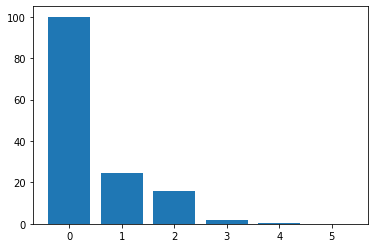

In [75]:
feature_importance = dtr.feature_importances_
feature_importance = feature_importance *100 /max(feature_importance)
index_short = np.flipud(np.argsort(feature_importance))

pos = np.arange(index_short.shape[0])
plt.bar(pos,feature_importance[index_short])